# Project Jupyter notebook 

Eoin Lawless - G00396053@atu.ie
Due Date 29/03/24

This Notebook will cover over the Driving Style Data examples for the classifier methods
### *SVM Vs Logistic Regression Vs kNN*

***


### First we will have a look at the data set itself

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df=pd.read_csv("opel_corsa_01.csv", delimiter=";")
df=df.rename(columns={"Unnamed: 0":"name"})
df.head()

## Discrepancies

To determine which among the three categorical features—roadSurface, traffic, drivingStyle—is best suited for basing models on in terms of fairness and variability, i'm gonna visualize the data.

In [200]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("opel_corsa_01.csv", delimiter=";")
df = df.rename(columns={"Unnamed: 0":"name"})

C:\Users\eoini\AppData\Local\Temp\ipykernel_12492\3736614528.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(value_counts.index, rotation=45, ha="right")
C:\Users\eoini\AppData\Local\Temp\ipykernel_12492\3736614528.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(value_counts.index, rotation=45, ha="right")
C:\Users\eoini\AppData\Local\Temp\ipykernel_12492\3736614528.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(value_counts.index, rotation=45, ha="right")


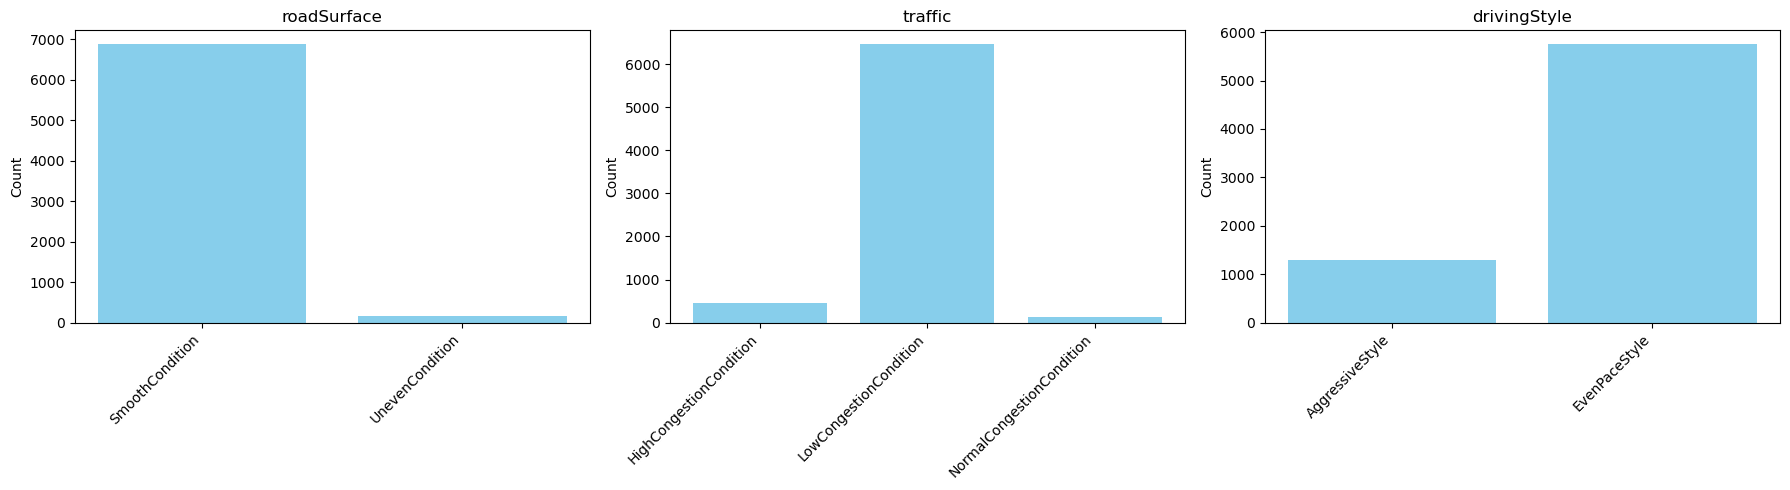

In [201]:
# Plotting the distribution of 'roadSurface', 'traffic', 'drivingStyle'
features = ['roadSurface', 'traffic', 'drivingStyle']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(features):
    # Calculate the value counts for each feature and sort by index for consistent order
    value_counts = df[feature].value_counts().sort_index()
    axes[i].bar(value_counts.index, value_counts.values, color='skyblue')
    axes[i].set_title(feature)
    axes[i].set_ylabel('Count')
    axes[i].set_xticklabels(value_counts.index, rotation=45, ha="right")

plt.tight_layout()
plt.show()

As you can see some adjustments will be needed.

Since im going to be focusing on the Driving feature, there are multiple ways to refactor the information.

Downsampling involves randomly removing instances of the majority class to reduce its size to that of the minority classes. In this case even pace will be reduced to Agressive. This can improve the performance of your model by ensuring that it doesn't become biased towards the majority class. However, be aware that downsampling reduces the total amount of data available for training, which might not be ideal if your dataset is small.

[Downsampling Reference](https://wellsr.com/python/upsampling-and-downsampling-imbalanced-data-in-python/).

Since I am donwsampling, I am gonna use Driving style from now as the main feature. This is because in the process of downsampling, it will still have a higher anmount of data the other two.

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("opel_corsa_01.csv", delimiter=";")
df = df.rename(columns={"Unnamed: 0":"name"})

In [203]:
# Separate by driving style
df_even_pace = df[df.drivingStyle == 'EvenPaceStyle']
df_aggressive = df[df.drivingStyle == 'AggressiveStyle']

In [214]:
# Displaying the original sample sizes
print("Original sample sizes:")
print(f"EvenPaceStyle: {len(df_even_pace)}")
print(f"AggressiveStyle: {len(df_aggressive)}\n")

Original sample sizes:
EvenPaceStyle: 5751
AggressiveStyle: 1287



In [204]:
# Find the number of instances in the smaller class
min_class_size = min(len(df_even_pace), len(df_aggressive))

In [205]:
# Downsample the larger class
if len(df_even_pace) > len(df_aggressive):
    df_even_pace_downsampled = df_even_pace.sample(n=min_class_size, random_state=42) 
    df_balanced = pd.concat([df_even_pace_downsampled, df_aggressive])
else:
    df_aggressive_downsampled = df_aggressive.sample(n=min_class_size, random_state=42)
    df_balanced = pd.concat([df_even_pace, df_aggressive_downsampled])

In [206]:
# Shuffle the dataset to mix up the order of rows
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

value_counts = df_balanced['drivingStyle'].value_counts()
print(value_counts)

EvenPaceStyle      1287
AggressiveStyle    1287
Name: drivingStyle, dtype: int64


***

## Support Vector Machine (SVM)

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [208]:
# setting variable form feature set
columns_to_include = ['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage',
                      'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration',
                      'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure',
                      'EngineRPM', 'MassAirFlow', 'IntakeAirTemperature', 'VerticalAcceleration',
                      'FuelConsumptionAverage']
X = df_balanced[columns_to_include]
y = df_balanced['drivingStyle']

In [209]:
# Splitting the dataset and Scaling 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [210]:
# SVM Model Training and Cross-Validation
model = SVC()
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

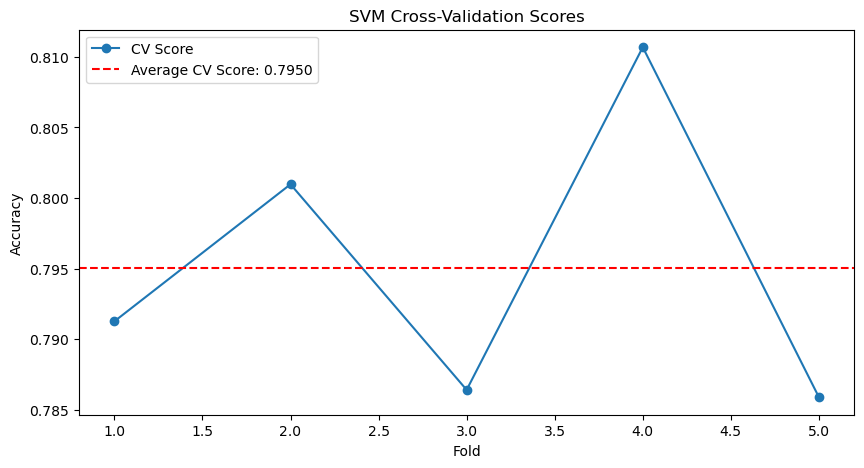

In [211]:
# Plotting the Cv scores 
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), cv_scores, marker='o', label='CV Score')
plt.axhline(np.mean(cv_scores), color='r', linestyle='--', label=f"Average CV Score: {np.mean(cv_scores):.4f}")
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('SVM Cross-Validation Scores')
plt.legend()
plt.show()

***

## Logistic Regression
[references](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [212]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
# setting variable form feature set
columns_to_include = ['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage',
                      'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration',
                      'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure',
                      'EngineRPM', 'MassAirFlow', 'IntakeAirTemperature', 'VerticalAcceleration',
                      'FuelConsumptionAverage']
X = df_balanced[columns_to_include]
y = df_balanced['drivingStyle']

In [ ]:
# Logistic Regression Model Training and Cross-Validation
model = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

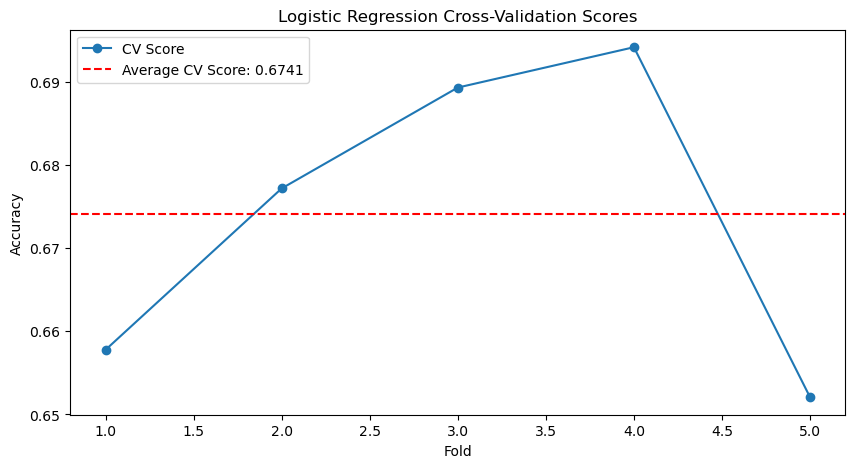

In [ ]:
# Plotting the CV scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), cv_scores, marker='o', label='CV Score')
plt.axhline(np.mean(cv_scores), color='r', linestyle='--', label=f"Average CV Score: {np.mean(cv_scores):.4f}")
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Cross-Validation Scores')
plt.legend()
plt.show()

***

## k-Nearest Neighbors (k-NN)

[references](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# setting variable form feature set
columns_to_include = ['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage',
                      'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration',
                      'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure',
                      'EngineRPM', 'MassAirFlow', 'IntakeAirTemperature', 'VerticalAcceleration',
                      'FuelConsumptionAverage']
X = df_balanced[columns_to_include]
y = df_balanced['drivingStyle']

In [ ]:
# Splitting the dataset and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
ks = range(1, 21)
mean_train_scores = []
mean_valid_scores = []

In [ ]:
import warnings

# Suppress FutureWarning related to mode function
warnings.simplefilter(action='ignore', category=FutureWarning)

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    train_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    valid_scores = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring='accuracy')
    
    mean_train_scores.append(np.mean(train_scores))
    mean_valid_scores.append(np.mean(valid_scores))

bestk = ks[np.argmax(mean_valid_scores)]

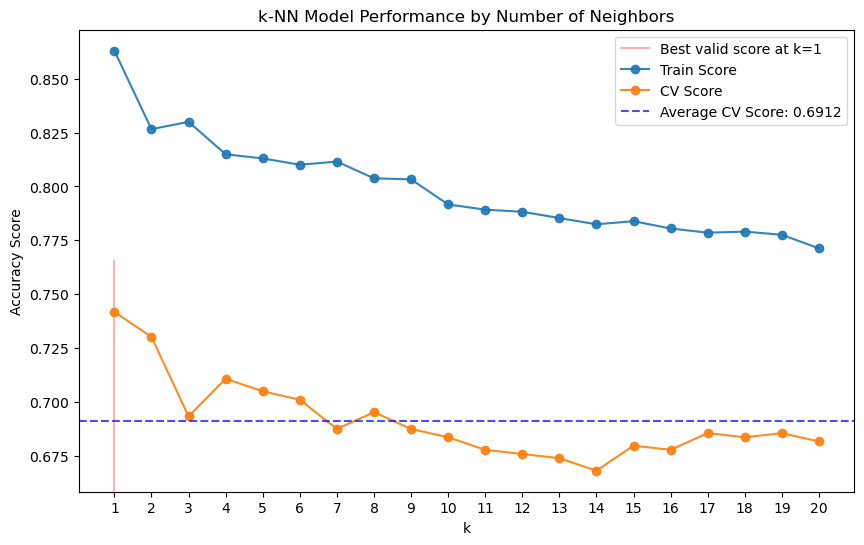

In [ ]:
plt.figure(figsize=(10, 6))
plt.axvline(bestk, 0, 0.5, color='r', label=f"Best valid score at k={bestk}", alpha=0.3)  # Best k
plt.plot(ks, mean_train_scores, marker='o', label='Train Score', alpha=0.9)  # Training scores
plt.plot(ks, mean_valid_scores, marker='o', label='CV Score', alpha=0.9)  # Cross-validation scores

avg_cv_score = np.mean(mean_valid_scores)
plt.axhline(avg_cv_score, color='blue', linestyle='--', label=f"Average CV Score: {avg_cv_score:.4f}", alpha=0.7)

plt.legend(loc='upper right')
plt.xticks(ks)  
plt.xlabel('k')
plt.ylabel('Accuracy Score')
plt.title('k-NN Model Performance by Number of Neighbors')
plt.show()


***
# conclusion

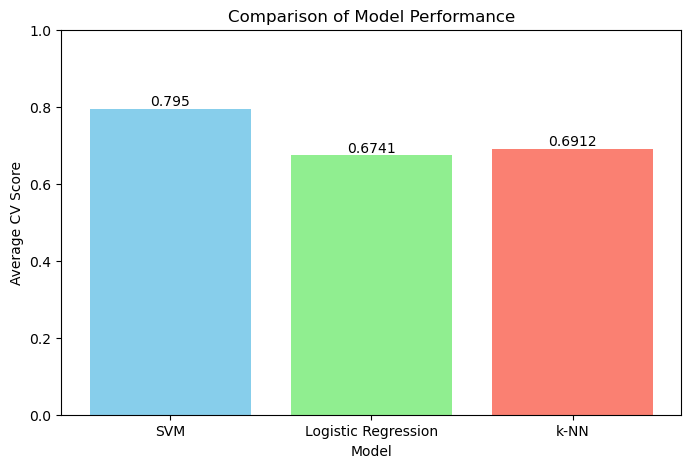

In [215]:
import matplotlib.pyplot as plt

# Model names and their corresponding average CV scores
models = ['SVM', 'Logistic Regression', 'k-NN']
cv_scores = [0.7950, 0.6741, 0.6912]

# Creating the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, cv_scores, color=['skyblue', 'lightgreen', 'salmon'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Average CV Score')
plt.title('Comparison of Model Performance')
plt.ylim(0, 1)
plt.show()


***